In [1]:
import TO_sim.Q_simul as QSIM
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [2]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [3]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)
N = 2000
K = 5.7
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=2000,start_p=True,seed=6)

sol = Qsimul.solve()
omega = Qsimul.omega

In [4]:
TLO_info = Qsimul.TLO(K_end=15)

In [5]:
print(TLO_info['cluster_info']['S+'].dropna().head(50))

6.0     176
6.1     186
6.2     190
6.3     192
6.4     193
6.5     195
6.6     196
6.7     197
6.8     197
6.9     198
7.0     200
7.1     193
7.2     191
7.3     190
7.4     168
7.5     168
7.6     151
7.7     139
7.8     135
7.9     125
8.0     125
8.1     109
8.2     111
8.3     111
8.4      93
8.5      93
8.6      89
8.7      87
8.8      78
8.9      74
9.0      45
9.1      45
9.2      41
9.3      41
9.4      27
9.6      22
9.8       5
10.4     49
10.5     50
10.6     50
10.7     50
10.8     50
10.9     50
11.0     50
11.1     50
11.2     50
11.3     50
11.4     50
11.5     50
11.6     50
Name: S+, dtype: object


In [6]:
SS = Qsimul.get_STEP(TLO_info,s_length=3)

In [7]:
SS

(Float64Index([6.0, 10.3, 13.4], dtype='float64'),
 Float64Index([6.8, 11.600000000000001, 13.899999999999999], dtype='float64'))

In [19]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']
K_end = 7.0#TLO_info['cluster_info']['S+'].dropna().index[0]

In [20]:
Ks = TLO_info['Theta_last'].index
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)

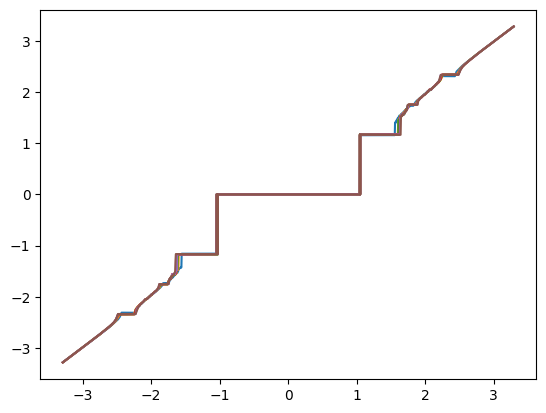

In [21]:
avg_dtheta = TLO_info['avg_dtheta'].iloc[np.arange(60,66)].to_numpy(float)
plt.plot(Qsimul.omega,avg_dtheta.T)


In [22]:
TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)

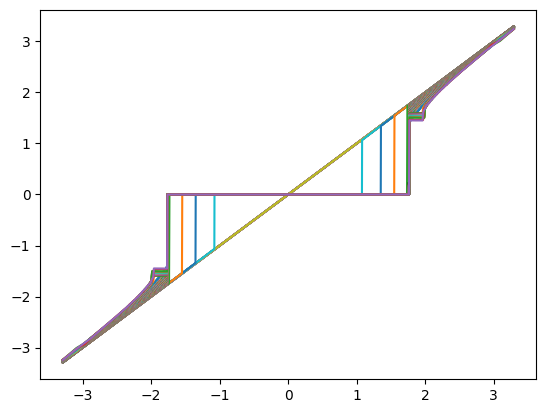

In [42]:

plt.plot(omega,TLO_back_info['avg_dtheta'].T);

In [32]:
BACKS = {}

In [33]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

NameError: name 'TLO_back_info' is not defined

In [43]:
BACKS[K_end] = TLO_back_info

In [12]:
MAX_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_info['r_info']['r_mean'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(r0*Ks/m) - 0.3056*1/np.sqrt(Ks*r0*m**3)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)


rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)
OPM = 4/np.pi * np.sqrt(rm*Ks/m) - 0.3056*1/np.sqrt(Ks*rm*m**3)

shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) + Ks**2 * rp * rp/(2*m*(1/m**2+(MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) + Ks**2 * rm * rm/(2*m*(1/m**2+(MIN_O0)**2)) 

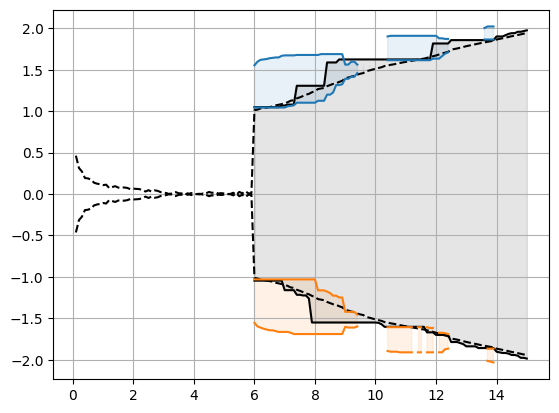

In [13]:


plt.plot(Ks, MAX_O0,color='black')
plt.plot(Ks, MIN_O0,color='black')
plt.fill_between(Ks,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks,OP0,color='black',linestyle='--')
plt.plot(Ks,-OP0,color='black',linestyle='--')


plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
# 1.1659297694635238
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks, MAX_OM,color='tab:orange')
plt.plot(Ks, MIN_OM,color='tab:orange')
plt.fill_between(Ks,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)

plt.grid()
# plt.xlim(0,15)

## ***BACKWARD***

In [16]:
# K_B = np.array([*BACKS.keys()])
K_ = np.linspace(0,30,10000)
get_K = interpolate.interp1d(F_R0u(K_),K_,kind='linear',bounds_error=False)

In [493]:
R0s = r_info['r0'].iloc[map(int,10*np.array([*K_B]))].to_numpy(float)
RPs = r_info['r+'].iloc[map(int,10*np.array([*K_B]))].to_numpy(float)
RMs = r_info['r-'].iloc[map(int,10*np.array([*K_B]))].to_numpy(float)

In [31]:
K_match = get_K(R0s)
OPM = OSP2.get_OPM(F_RMu(K_match),K_match,m)
K_match,OPM

NameError: name 'R0s' is not defined

In [247]:
F_Bs = {}
for K_b,K_m,opm in zip(K_B,K_match,OPM):
    # F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,OPM)
    F_Bs[K_b] = OSP2.Make_R0_function(m,opm)


In [18]:
_,_,rs_d,rs_u,_,_= OSP2.get_r_sec_np(Ks,m,F_R0u,F_RMu,samples=30)

In [85]:
F_RSU = interpolate.interp1d(Ks,rs_u,kind='linear',bounds_error=False)

In [254]:
# RPs = F_RSU(K_B)
# R0s = F_R0u(K_B)
O_P2 = 4/np.pi * np.sqrt(F_RSU(K_B)*K_B/m) - 0.3056*1/np.sqrt(F_RSU(K_B)*K_B*m**3)
shift_OP = (K_B**2*R0s*RPs)/(2*m*(1/m**2+(OPM)**2)) - (K_B**2*RPs*RPs)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))
O_2O = OPM+ shift_OP + O_P2

In [255]:
O_2O

array([1.55392709, 1.8400118 , 1.9889498 ])

In [123]:
O_2O

array([1.5432406 , 1.88003433, 2.02212659])

In [251]:
F_B2S = {}

In [256]:
for i,K_b in enumerate(K_B):
    Ks_back = BACKS[K_b]['Ks']
    r_info_back = BACKS[K_b]['r_info']
    cluster_info_back = BACKS[K_b]['r_info']
    F0_RMd,F0_RMu,F0_R0d,F0_R0u = F_Bs[K_b]

    opm = OPM[i]
    o_20 = O_2O[i]
    F_S,F_OR = OSP2.get_shift(opm)

    F_B2S[K_b]= OSP2.get_r_sec0_np(Ks_back,m,opm,o_20,F_R0u,F_S,F_OR,samples=40)
    

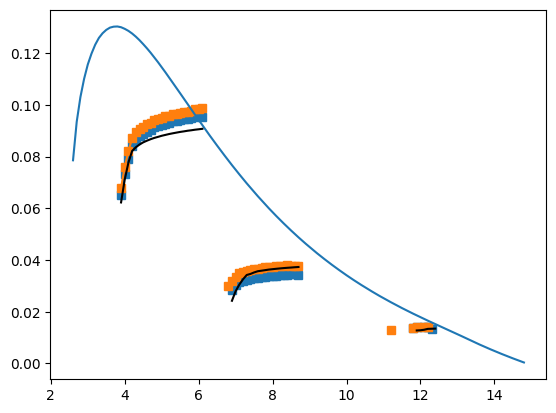

In [546]:
for K_b,TLO_back_info in BACKS.items():
    Ks_back = TLO_back_info['Ks']
    r_info_back = TLO_back_info['r_info']
    cluster_info_back = TLO_back_info['r_info']
    rp = r_info_back['r+']
    rm = r_info_back['r-']
    r0 = r_info_back['r0']
    plt.plot(Ks_back,rp,'s-',color='tab:blue')
    plt.plot(Ks_back,rm,'s-',color='tab:orange')
    # plt.plot(Ks_back,r0,'s-')
    F0_RMd,F0_RMu,F0_R0d,F0_R0u = F_Bs[K_b]
    d,u,rs_d0,rs_u0 = F_B2S[K_b]
    # plt.plot(Ks_back,F0_R0u(Ks_back))
    plt.plot(Ks_back,rs_u0,color='black',zorder=10)
plt.plot(Ks,rs_u)

In [233]:
MAX_O0 = TLO_back_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_back_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_back_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_back_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_back_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_back_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_back_info['r_info']['r_mean'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(r0*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*r0*m**3)
rmA = F_RMu(Ks_back)
OP0A = 4/np.pi * np.sqrt(rmA*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rmA*m**3)


rp = TLO_back_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rp*m**3)

rm = TLO_back_info['r_info']['r-'].to_numpy(float)
# OPM = 4/np.pi * np.sqrt(rm*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rm*m**3)

shift_P = Ks_back**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) - Ks_back**2 * rp * rp/(4*m*(1/m+(2*m*MAX_O0)**2)) 
shift_M = Ks_back**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) - Ks_back**2 * rm * rm/(4*m*(1/m+(2*m*MIN_O0)**2)) 

In [151]:
DR = Ks_back*rp
F_S,F_OR = OSP2.get_shift(abs(MAX_O0[~np.isnan(MAX_O0)][0]))

A = F_OR(OPM[0]+shift_OP[0]+OPP[-1])
F_S,F_OR = OSP2.get_shift(abs(MAX_O0[~np.isnan(MAX_O0)][0]))
ORS = F_OR(MAX_OP[~np.isnan(MAX_OP)])

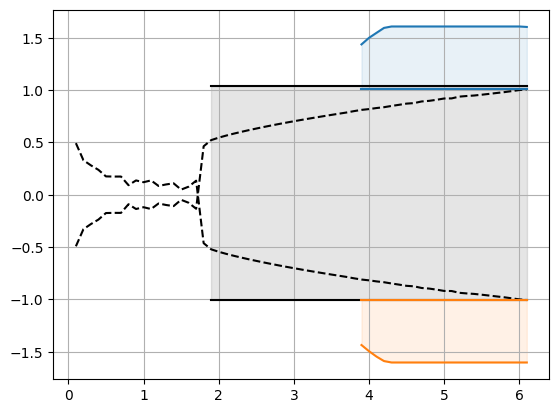

In [236]:


plt.plot(Ks_back, MAX_O0,color='black')
plt.plot(Ks_back, MIN_O0,color='black')
plt.fill_between(Ks_back,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks_back,OP0,color='black',linestyle='--')
plt.plot(Ks_back,-OP0,color='black',linestyle='--')


plt.plot(Ks_back, MAX_OP,color='tab:blue')
plt.plot(Ks_back, MIN_OP,color='tab:blue')
plt.fill_between(Ks_back,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
plt.axhline(OPM[0])
plt.plot(Ks_back,OPM[0]+shift_M)
# plt.plot(Ks_back,A+DR)
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks_back, MAX_OM,color='tab:orange')
plt.plot(Ks_back, MIN_OM,color='tab:orange')
plt.fill_between(Ks_back,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)

plt.grid()
# plt.xlim(0,15)

## ***FOWARD***

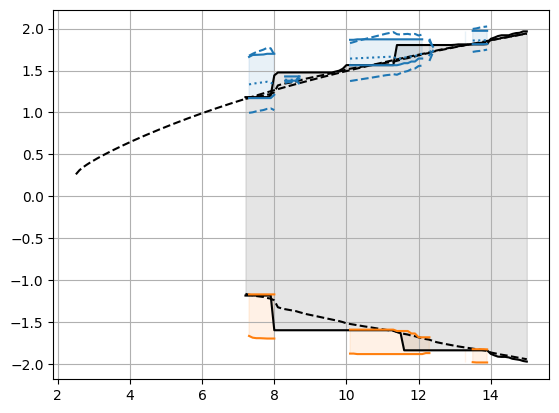

In [26]:
MAX_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_info['r_info']['r0'].to_numpy(float)
rM = TLO_info['r_info']['r_mean'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(rM*Ks/m) - 0.3056*1/np.sqrt(Ks*r0*m**3)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)


rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)


shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) - Ks**2 * rp * rp/(4*m*(1/m+(2*m*MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) - Ks**2 * rm * rm/(4*m*(1/m+(2*m*MIN_O0)**2)) 

plt.plot(Ks, MAX_O0,color='black')
plt.plot(Ks, MIN_O0,color='black')
plt.fill_between(Ks,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks,OP0,color='black',linestyle='--')
plt.plot(Ks,OP0A,color='black',linestyle='--')
plt.plot(Ks,-OP0,color='black',linestyle='--')

plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
# 1.1659297694635238
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks, MAX_OM,color='tab:orange')
plt.plot(Ks, MIN_OM,color='tab:orange')
plt.fill_between(Ks,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)



plt.plot(Ks,OP0+shift_P+OPP,color='tab:blue',linestyle='--')
plt.plot(Ks,MIN_OP+shift_P,color='tab:blue',linestyle=':')
plt.plot(Ks,OP0+shift_P-OPP,color='tab:blue',linestyle='--')

plt.grid()
# plt.xlim(0,15)

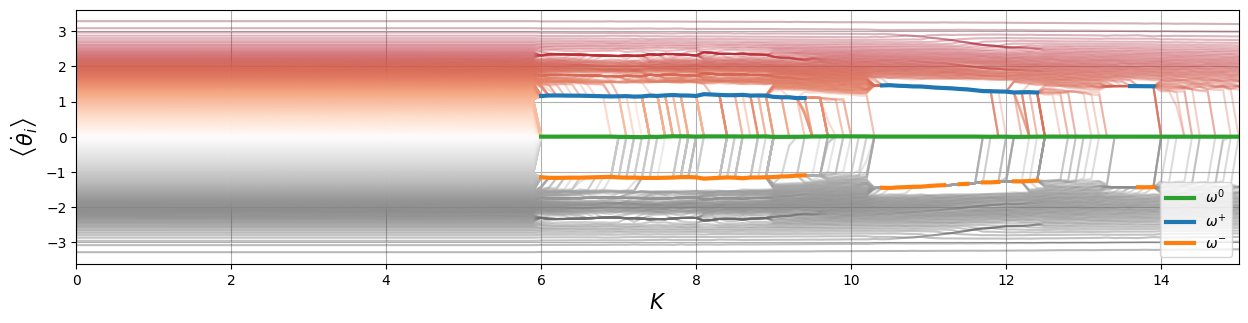

In [17]:
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\omega^{0}$')
plt.plot(TLO_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\omega^{+}$')
plt.plot(TLO_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
plt.xlim(0,15)
plt.xlabel('$K$',fontsize=15)
plt.show()

In [188]:
SS

(Float64Index([6.0, 7.9, 8.700000000000001, 12.3], dtype='float64'),
 Float64Index([6.6, 8.3, 10.2, 13.2], dtype='float64'))

In [27]:
opm = OPM[0]


NameError: name 'OPM' is not defined

In [41]:
TLO_info['r_info']['r+'].dropna()

7.3     0.069387
7.4     0.071323
7.5     0.071767
7.6     0.072058
7.7     0.072361
7.8     0.072752
7.9     0.069895
8.0      0.06008
8.3     0.004787
8.4     0.004838
8.5      0.00499
8.6     0.004935
8.7      0.00282
10.1    0.026089
10.2    0.026207
10.3    0.026574
10.4    0.026728
10.5    0.026822
10.6     0.02687
10.7    0.026937
10.8    0.026975
10.9    0.027061
11.0    0.027135
11.1    0.027171
11.2     0.02723
11.3      0.0272
11.4    0.025545
11.5     0.02347
11.6    0.022555
11.7    0.021787
11.8    0.019524
11.9    0.019369
12.0    0.016195
12.1    0.016435
12.3    0.010785
12.4    0.004073
13.3    0.009922
13.5      0.0102
13.6    0.010087
13.7    0.010252
13.8    0.010206
13.9    0.009994
Name: r+, dtype: object

In [53]:
opm = OP0[73]
K_S = np.arange(7.3,8,0.1)
r0 = TLO_info['r_info']['r0'].iloc[int(7.3*10)]
K_m = get_K(r0)
OR = OSP2.get_OPM(F_RMu(K_m),K_m,m)
K_m,OR

(array(7.2938764), 1.1752883480852245)

In [51]:
OPM

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.33734171, 0.34784

In [ ]:
# RPs = F_RSU(K_B)
# R0s = F_R0u(K_B)
O_P2 = 4/np.pi * np.sqrt(F_RSU(K_B)*K_B/m) - 0.3056*1/np.sqrt(F_RSU(K_B)*K_B*m**3)
shift_OP = (K_B**2*R0s*RPs)/(2*m*(1/m**2+(OPM)**2)) - (K_B**2*RPs*RPs)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))
O_2O = OPM+ shift_OP + O_P2

In [45]:
K_match = get_K(R0s)
OPM = OSP2.get_OPM(F_RMu(K_match),K_match,m)
K_match,OPM

NameError: name 'R0s' is not defined

In [49]:
opm

0.3373417104140599

In [54]:
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,opm)

In [199]:
_,_,rs_ds,rs_us,_,_= OSP2.get_r_sec_np(K_S,m,F0_RMu,samples=30)

In [462]:
_,_,rs_ds,rs_us= OSP2.get_r_sec0_np(K_S,m,F0_RMu,opm,samples=30)


TypeError: get_r_sec0() missing 2 required positional arguments: 'F_S' and 'F_OR'

array([-0.        ,  0.00035872,  0.00071777,  0.00107666,  0.00143549,
        0.00179356,  0.00215098,  0.00250595,  0.00285932,  0.00321076,
        0.00355984,  0.00390596,  0.00424924,  0.00459   ,  0.00492695])

In [14]:
RS = r_info.columns[0:8]
plt.plot(Ks,rs_u)
plt.plot(K_S,rs_us)
plt.plot(Ks,(F_R0u(Ks)-F_RMu(Ks))/2)
DD = (F_R0u(K_S)-F_RMu(K_S))/2
plt.plot(K_S,rs_us-(DD-DD[0]))
r_Pl,r_Ml=plt.plot(r_info[RS[2:4]],marker='s',markersize=3)
r_Plf =plt.fill_between(r_info['r+'].index,(r_info['r+']-r_info['sig+']).to_numpy(float),
                 (r_info['r+']+r_info['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)
r_Mlf =plt.fill_between(r_info['r-'].index,(r_info['r-']-r_info['sig-']).to_numpy(float),
                 (r_info['r-']+r_info['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)

NameError: name 'rs_u' is not defined

In [17]:

OP0As = 4/np.pi * np.sqrt(F0_RMu(K_S)*K_S/m) - 0.3056*1/np.sqrt(K_S*F0_RMu(K_S)*m**3)

r0 = TLO_info['r_info']['r0'].to_numpy(float)
rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)

shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) + Ks**2 * rp * rp/(2*m*(1/m**2+(MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) + Ks**2 * rm * rm/(2*m*(1/m**2+(MIN_O0)**2)) 

plt.plot(Ks, MAX_O0,color='black')
plt.plot(Ks, MIN_O0,color='black')
plt.fill_between(Ks,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks,OP0,color='black',linestyle='--')
plt.plot(Ks,OP0A,color='black',linestyle='--')
plt.plot(Ks,-OP0,color='black',linestyle='--')

plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
# 1.1659297694635238
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks, MAX_OM,color='tab:orange')
plt.plot(Ks, MIN_OM,color='tab:orange')
plt.fill_between(Ks,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)
plt.plot(K_S,OP0As,'r--')


plt.plot(Ks,OP0+shift_P+OPP,color='tab:blue',linestyle='--')
plt.plot(Ks,MIN_OP+shift_P,color='tab:blue',linestyle=':')
plt.plot(Ks,OP0+shift_P-OPP,color='tab:blue',linestyle='--')

plt.grid()
# plt.xlim(0,15)

NameError: name 'F0_RMu' is not defined

Text(0.5, 1.0, '$m = 6, N = 2000$')

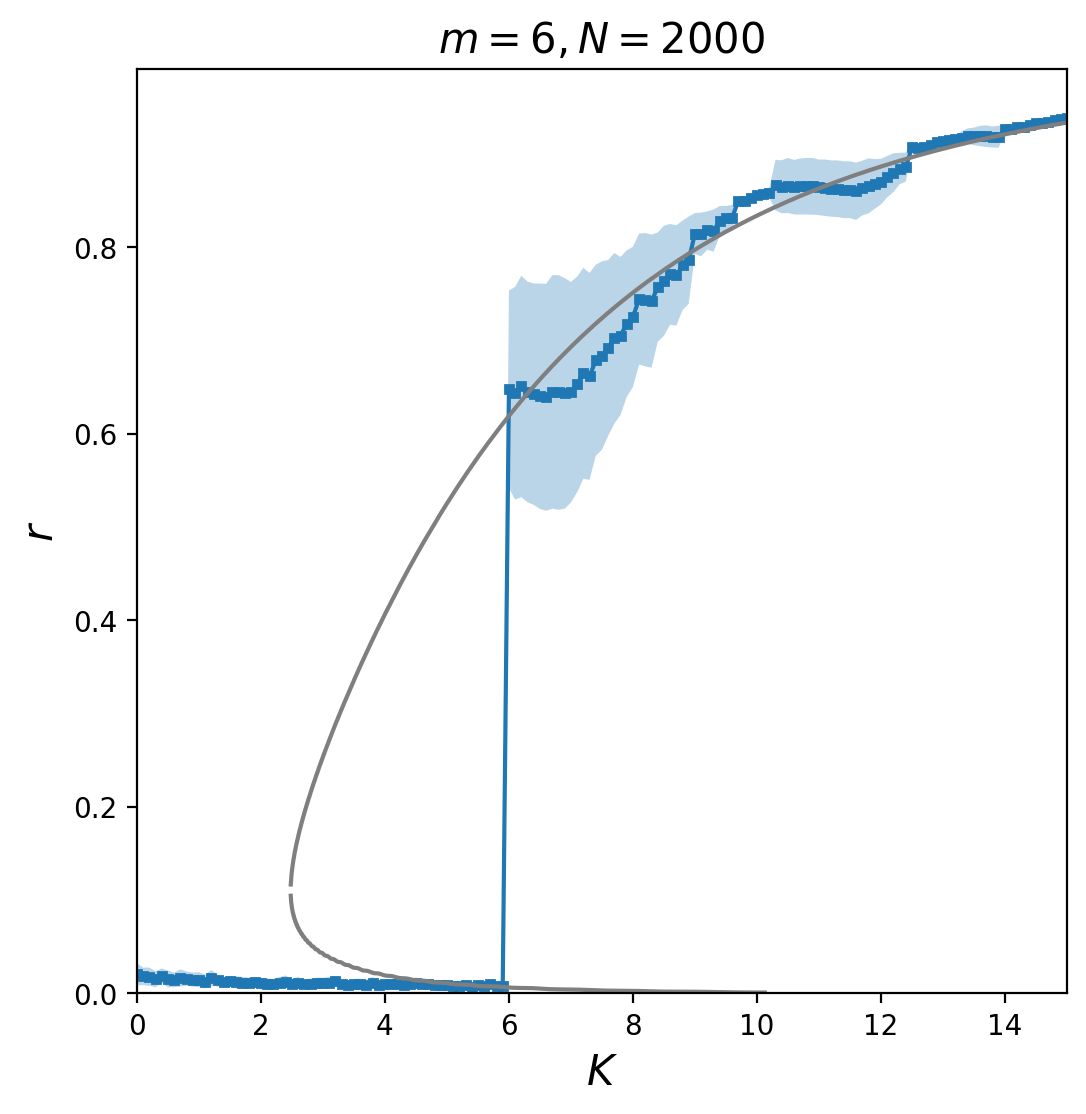

In [18]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info[RS[4]].index,(r_info[RS[0]]-r_info['sig_mean']).to_numpy(float),
                 (r_info[RS[0]]+r_info['sig_mean']).to_numpy(float),alpha=0.3)



RMl, = plt.plot(K_,F_RMu(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
# plt.legend([(r_Ml,r_Mlf),RMl],['$r$','$r_{anlytical}$','$r_{stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# R_STD = OSP.get_rstd(F_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,15)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

In [28]:
DR = Ks*rp
OOO = MAX_O0[~np.isnan(MAX_O0)][0]
F_S,F_OR = OSP2.get_shift(OOO)

A = F_OR(OPM[0]+shift_OP[0]+OPP[-1])
ORS = F_OR(MAX_OP)

NameError: name 'OPM' is not defined

In [524]:

O_P2 = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(rp*Ks*m**3)
shift_OP = (Ks**2*r0*rp)/(2*m*(1/m**2+(ORS)**2)) - (Ks**2*rp*rp)/(2*m**2*ORS*(1/m**2+(2*ORS)**2))
shift_Ob = (Ks**2*r0*rp)/(2*m*(1/m**2+(OOO)**2)) - (Ks**2*rp*rp)/(2*m**2*OOO*(1/m**2+(2*OOO)**2))
O_2O = OOO+ shift_OP + O_P2

In [525]:
DD = rp*Ks

In [526]:
O_P2 = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(rp*Ks*m**3)


In [527]:
O_2O = ORS  O_P2

SyntaxError: invalid syntax (2135985257.py, line 1)

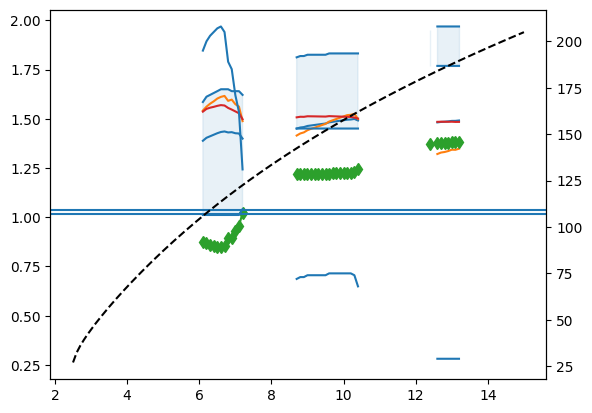

In [533]:
# plt.plot(shift_OP)
# plt.plot(Ks,O_2O-shift_Ob/2)
# plt.plot(Ks,OOO+shift_OP)
plt.plot(Ks,ORS+shift_OP)
plt.plot(Ks,opm+shift_Ob+O_P2)
plt.plot(Ks,ORS+shift_Ob-DD,'d-')
plt.plot(Ks,ORS+O_P2-shift_OP)
# plt.plot(Ks,OOO+shift_OP-O_P2)
# plt.plot(Ks,OOO+shift_Ob)
plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
plt.axhline(OOO)
plt.axhline(opm)
plt.plot(Ks,OP0A,color='black',linestyle='--')
plt.gca().twinx()
plt.plot(TLO_info['cluster_info']['S+'])

NameError: name 'O_2O' is not defined

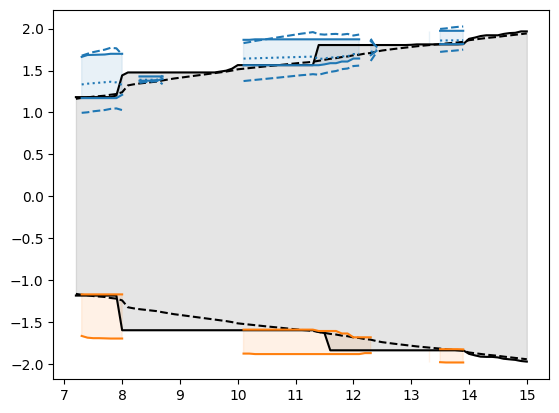

In [29]:
MAX_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_info['r_info']['r0'].to_numpy(float)
rM = TLO_info['r_info']['r_mean'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(rM*Ks/m) - 0.3056*1/np.sqrt(Ks*r0*m**3)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)


rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)


shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) - Ks**2 * rp * rp/(4*m*(1/m+(2*m*MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) - Ks**2 * rm * rm/(4*m*(1/m+(2*m*MIN_O0)**2)) 

plt.plot(Ks, MAX_O0,color='black')
plt.plot(Ks, MIN_O0,color='black')
plt.fill_between(Ks,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks,OP0,color='black',linestyle='--')
# plt.plot(Ks,OP0A,color='black',linestyle='--')
plt.plot(Ks,-OP0,color='black',linestyle='--')

plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)

# 1.1659297694635238
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks, MAX_OM,color='tab:orange')
plt.plot(Ks, MIN_OM,color='tab:orange')
plt.fill_between(Ks,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)



plt.plot(Ks,OP0+shift_P+OPP,color='tab:blue',linestyle='--')
plt.plot(Ks,MIN_OP+shift_P,color='tab:blue',linestyle=':')
plt.plot(Ks,OP0+shift_P-OPP,color='tab:blue',linestyle='--')
plt.plot(Ks,O_2O)
plt.plot(Ks,O_2O+shift_OP)


plt.grid()
# plt.xlim(0,15)

In [356]:
def g_n(x):
    return norm.pdf(x,0,1)
def g_sec(x,Or,Om):
    g = norm.pdf(x+Om,0,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

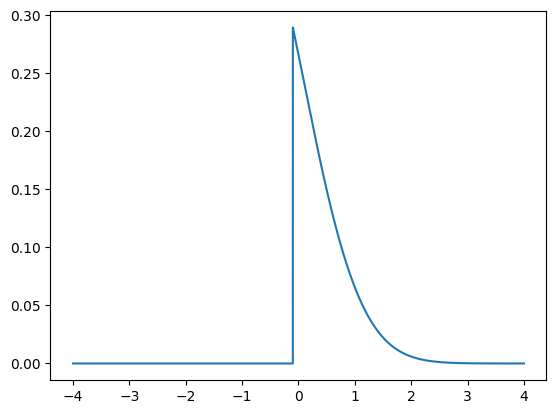

In [368]:
x_ = np.linspace(-4,4,10000)
plt.plot(x_,g_sec(x_,1,0.9))

In [534]:

def F_sec0(r,K,m,O_0,F_R0,g=g_sec):
    X = K*r
    a = 1/np.sqrt(X*m)
    b = 4/np.pi * a - 0.3056*a**3
    r_0 = F_R0(K)
    bs = np.where(np.where(a>1.193,1,b)>=1,1,b)
    a0 = 1/np.sqrt(K*r_0*m)

    O_pm = O_0
    shift_O = (K**2*r*r_0)/(2*m*(1/m**2+(O_pm)**2)) - (K**2*r*r)/(2*m**2*O_pm*(1/m**2+(2*O_pm)**2))
    
    OP = bs*X
    integrand_drift = lambda x:1/(2*(m*(x+O_pm+shift_O)**2+1/m))*g(x,O_pm+shift_O,O_pm)
    integrand_lock = lambda x:g(x,O_pm+shift_O,O_pm)*np.sqrt(1-((x)/X)**2)
    OM = -shift_O
    I_d,err = quad(integrand_drift,OP,np.inf,limit=200)
    I_l,err = quad(integrand_lock,OM ,OP,limit=200)
    
    return I_l/X-I_d,I_l/X,-I_d
get_F20 = np.vectorize(F_sec0)

def get_r_sec0(K,m,O_0,FR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_sd_l,r_su_l = np.nan,np.nan
    mu = np.nan
    md = np.nan
    shift_Os = np.nan
    if (K == 0)or (m==0):
        return r_sd,r_su,r_sd_l,r_su_l
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2,Fl,Fd = get_F20(r_test,K,m,O_0,FR)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    Rl_interpolate  = interpolate.interp1d(r_test,Fl, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,5000)
    Fs = R2_interpolate(r_test2)
    Fls = Rl_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    F_ls = (Fls[arg_check] +Fls[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
        r_sd_l,r_su_l = F_ls[0]*K*r_sd,F_ls[1]*K*r_su

    if len(r_sec)==1:
        r_su = r_sec
        r_su_l = F_ls*K*r_su


    return r_sd,r_su,r_sd_l,r_su_l
get_r_sec0_np = np.vectorize(get_r_sec0)

In [495]:
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,opm)

In [514]:
F_S,F_OR = OSP2.get_shift(opm)

In [518]:
F_OR(opm+0.3+1) - (opm+0.3)

0.1425834944087847

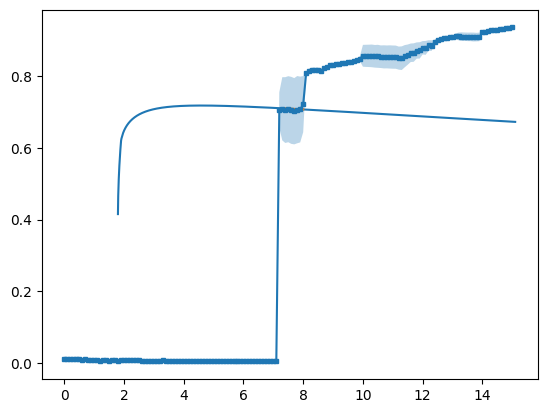

In [55]:
plt.plot(K_,F0_RMu(K_))
plt.plot(K_S,F0_RMu(K_S))
r_Ml, =plt.plot(r_info[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info[RS[4]].index,(r_info[RS[0]]-r_info['sig_mean']).to_numpy(float),
                 (r_info[RS[0]]+r_info['sig_mean']).to_numpy(float),alpha=0.3)

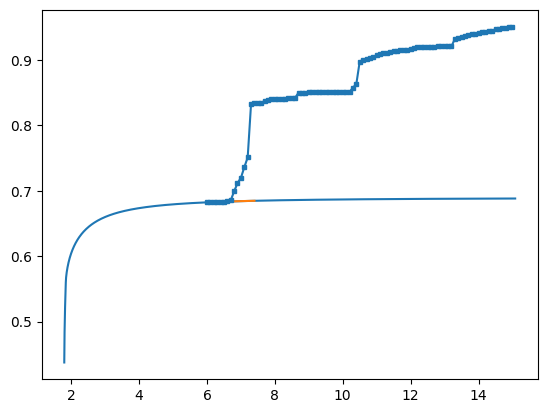

In [540]:
plt.plot(K_,F0_R0u(K_))
plt.plot(K_S,F0_R0u(K_S))
r_Ml, =plt.plot(r_info['r0'],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info['r0'].index,(r_info['r0']-r_info['sig0']).to_numpy(float),
                 (r_info['r0']+r_info['sig0']).to_numpy(float),alpha=0.3)

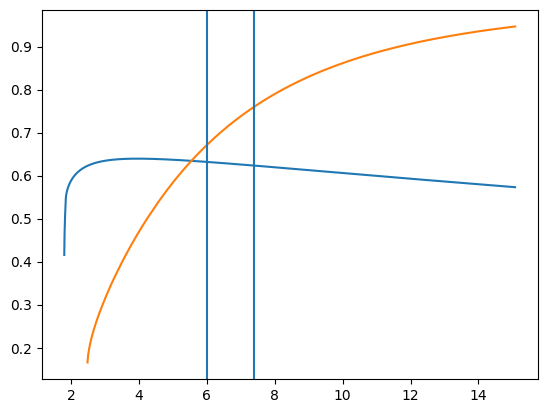

In [401]:
plt.plot(K_,F0_RMu(K_))
plt.plot(K_,F_R0u(K_))
plt.axvline(K_S[0])
plt.axvline(K_S[-1])

In [537]:
# _,_,rs_ds,rs_us= get_r_sec0_np(Ks,m,opm,F0_RMu,samples=30)
_,_,rs_ds,rs_us= get_r_sec0_np(K_S,m,opm,F0_R0u,samples=30)

In [505]:
_,_,rs_ds,rs_us2,_,_= OSP2.get_r_sec_np(K_S,m,F0_RMu,F0_RMu,samples=30)

In [19]:
plt.plot(K_S,rs_us)
plt.plot(K_S,rs_us2)
plt.plot(Ks,rs_u)

r_Ml, =plt.plot(r_info['r+'],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info['r+'].index,(r_info['r+']-r_info['sig+']).to_numpy(float),
                 (r_info['r+']+r_info['sig+']).to_numpy(float),alpha=0.3)

NameError: name 'K_S' is not defined

In [552]:
TEMP = pd.read_excel('NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])

In [554]:
df_7 =TEMP.query('K==7')

In [560]:
df_7.reset_index().set_index('m')['r+_ul'].dropna()

m
4.5     0.018525
4.6     0.024341
4.7     0.029503
4.8     0.033889
4.9     0.037839
5.0     0.041505
5.1     0.044983
5.2     0.048337
5.3     0.051594
5.4     0.054750
5.5     0.057848
5.6     0.060904
5.7     0.063897
5.8     0.066855
5.9     0.069777
6.0     0.072642
6.1     0.075481
6.2     0.078293
6.3     0.081070
6.4     0.083837
6.5     0.086549
6.6     0.089244
6.7     0.091914
6.8     0.094547
6.9     0.097155
7.0     0.099736
7.1     0.102294
7.2     0.104822
7.3     0.107322
7.4     0.109789
7.5     0.112246
7.6     0.114673
7.7     0.117064
7.8     0.119423
7.9     0.121767
8.0     0.124073
8.1     0.126367
8.2     0.128623
8.3     0.130842
8.4     0.133035
8.5     0.135227
8.6     0.137373
8.7     0.139501
8.8     0.141589
8.9     0.143659
9.0     0.145708
9.1     0.147721
9.2     0.149710
9.3     0.151661
9.4     0.153613
9.5     0.155528
9.6     0.157395
9.7     0.159269
9.8     0.161098
9.9     0.162911
10.0    0.164678
Name: r+_ul, dtype: float64

### BACKWARD 과정의 이론 확인

In [600]:
MAX_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_info['r_info']['r0'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(r0*Ks/m) - 0.3056*1/np.sqrt(Ks*r0*m**3)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)


rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)
# OPM = 4/np.pi * np.sqrt(rm*Ks/m) - 0.3056*1/np.sqrt(Ks*rm*m**3)

shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) - Ks**2 * rp * rp/(2*m*(1/m**2+(MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) - Ks**2 * rm * rm/(2*m*(1/m**2+(MIN_O0)**2)) 

In [608]:
shift_OP = (Ks**2*r0*rp)/(2*m*(1/m**2+(MAX_O0)**2)) - (Ks**2*rp*rp)/(2*m**2*MAX_O0*(1/m**2+(2*MAX_O0)**2))
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)
shift_Ob = (Ks**2*r0*rp)/(2*m*(1/m**2+(opm)**2)) - (Ks**2*rp*rp)/(2*m**2*opm*(1/m**2+(2*opm)**2))

In [615]:
F_S,F_OR = OSP2.get_shift(opm)
F_S2,F_OR2 = OSP2.get_shift(OPM[1])

In [617]:
OPM

array([1.01428158, 1.45271666, 1.76704533])

In [598]:
ODP = rp*Ks

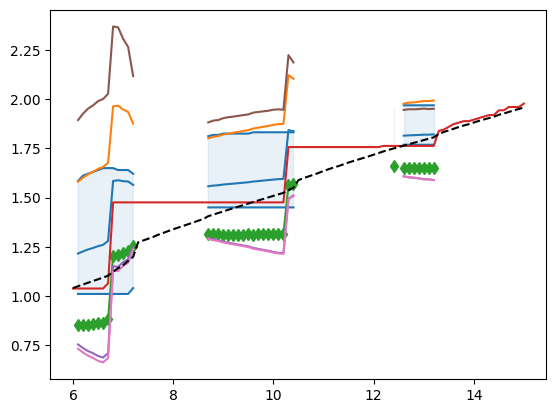

In [621]:
plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
plt.plot(Ks,MAX_O0+shift_OP)
plt.plot(Ks,MAX_O0+shift_OP+OPP)
plt.plot(Ks,MAX_O0+shift_OP-OPP,'d-')

# plt.plot(Ks, MAX_OP -  OPP,color='tab:red')
plt.plot(Ks,MAX_O0)
# plt.plot(Ks,MAX_O0+F_S(OPP - shift_Ob)+OPP)
plt.plot(Ks,MAX_O0+F_S(ODP - shift_Ob)-ODP)
plt.plot(Ks,MAX_O0+F_S(ODP - shift_Ob)+ODP)
plt.plot(Ks,MAX_O0+F_S2(ODP - shift_Ob)-ODP)
plt.plot(Ks,OP0,color='black',linestyle='--')


In [589]:
opm, OPM[0]

(1.0142815788789552, 1.0142815788789552)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.15666466, 0.15497608, 0.15280062, 0.1503397 ,
       0.14768512, 0.14488051, 0.14166523, 0.13594794, 0.13000773,
       0.12611009, 0.12004298, 0.11536766,        nan,        

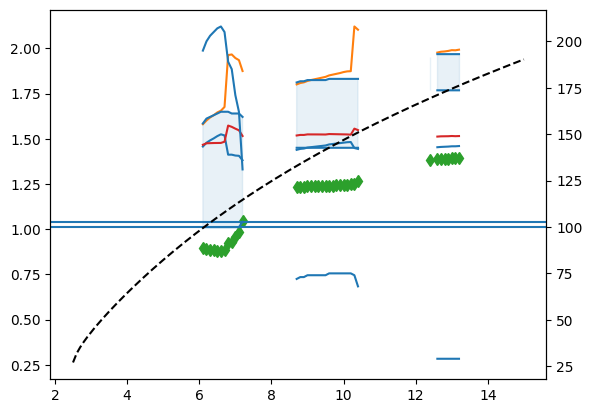

In [626]:
# plt.plot(shift_OP)
# plt.plot(Ks,O_2O-shift_Ob/2)
# plt.plot(Ks,OOO+shift_OP)
plt.plot(Ks,ORS+shift_OP)
plt.plot(Ks,MAX_O0+shift_OP+OPP)
plt.plot(Ks,ORS+shift_Ob-DD,'d-')
plt.plot(Ks,ORS+O_P2-shift_OP)
# plt.plot(Ks,OOO+shift_OP-O_P2)
# plt.plot(Ks,OOO+shift_Ob)
plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
plt.axhline(OOO)
plt.axhline(opm)
plt.plot(Ks,OP0A,color='black',linestyle='--')
plt.gca().twinx()
plt.plot(TLO_info['cluster_info']['S+'])

In [628]:
import TO_sim.Integrator_jit as IJ

RK4_jit = IJ.RK4
RK4_jit_set = IJ.RK4_sets

RK4_jit_short = IJ.RK4_short

In [ ]:
RK4_jit_set 